# Appendix A:


In [1]:
#DNA strings given in the problem
a='''GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAG\
TTCTGCTACATTCCTAGCTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTCTCATAGTGAATAAC'''



b='GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTT\
CGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTAC'
c='GTCCCTCGTCAAGACGTTTCTATTTTATTCCAGCAGGATTCAATCGGCATCA\
GTTCTGTACATTCCTGCAAAGAAGTACTAGACAGCGTCATAGTCTCTATCTAACTAATTAA'

d='ACCTCTCACTAAGTTTCATCAGGACGAGAGAATAAAGACTTCACGTTTCAGTAGCACT\
TCCTGGCCCACACGAGGTACCTAGCAAGCGGTATATAGTCTTTTTTTAGATAGGGAT'

e='GTCCTCTGTCAAAGATGTATTACTGTTTTGCACAGGAATTCAACGGGCATTCAGTTTT\
GTACATTACTCGCAAAGACAGTTACTAGACCAACGTCATAAGTCTCTACAAACTAATTAA'

f='ACCTCTCACTGCAGTTTATCAGGACGAGAGAATAAGATGTCATGTTTCAGTATCATTC\
CTGCCACACGAGTACTAGAAGCGGTATATAGTCTTTTTCTAGATAGGAT'

g='ACGTCATCACCTCCAGATTTATCTAGGCACGCGAGAATAAGATGTACATGATTTACAGTA\
ACATTCCTGCCACACAGTTAGAAGTGATATAGTCTGTCTTCTTAGATCAGGAT'


Set_Strings= [a,b,c,d,e,f,g]

In [2]:
def longest_common_subsequence(X, Y):
    """
 Find the Longest Common Subsequence (LCS) between two strings and return all unique LCSs along with 
 their length.

    Parameters:
    X (str): The first input string
    Y (str): The second input string

    Returns:
    tuple: A tuple containing a list of all unique LCSs and the length of the first LCS in the list.
    """

    # Lookup table used to store the lengths of LCS between substrings of X (X[0...i-1]) and Y (Y[0...j-1])
    lookup_table = [[0 for x in range(len(Y) + 1)] for y in range(len(X) + 1)]

    # Use this function (LCS_table) to fill out the lookup table:
    LCS_table(X, Y, lookup_table)

    # Use this function to find all the longest common subsequences (LCSs)
    lcs = LCSs(X, Y, len(X), len(Y), lookup_table)  # Avoid duplicates
    lcs_set = set(lcs)
    lcs_list = list(lcs_set)
    all_lcs = (lcs_list, len(lcs_list[0]))

    return all_lcs

def LCS_table(X, Y, lookup_table):
    """
    Use a bottom-up dynamic programming approach to calculate the LCS between two strings and 
    fill out the lookup table.

    Parameters:
    X (str): The first input string
    Y (str): The second input string
    lookup_table (list): A 2D list used to store the intermediate results of calculating LCS

    Returns:
    list: The filled lookup table.
    """

    # Using a bottom-up approach, fill out the lookup table
    for i in range(1, len(X) + 1):
        for j in range(1, len(Y) + 1):
            # In case the current elements of X and Y are the same
            if X[i - 1] == Y[j - 1]:
                lookup_table[i][j] = lookup_table[i - 1][j - 1] + 1
            # In case they are different:
            else:
                lookup_table[i][j] = max(lookup_table[i - 1][j], lookup_table[i][j - 1])

    return lookup_table


In [3]:
def LCSs(X, Y, m, n, lookup_table):
    """
    This function uses the lookup table to determine and return all the possible longest common subsequences
    between X and Y. It implements a dynamic programming approach as it utilizes the lookup table we built
    to store the lengths of the longest common subsequences between the substrings of X and Y.
    Inputs
    ----------
    X, Y: strings
        Strings to compute the LCS
    m: int
        length of string X
    n: int
        length of string Y
    lookup_table: 2d list
        2D list containing the lookup table constructed
    Returns
    ----------
    list
        list of all possible LCSs between X and Y
    """
    # if we have no charachters in one of the strings left, return list of empty string
    if m == 0 or n == 0: 
        return ['']
    # if the last charachters in both strings match
    if X[m-1] == Y[n-1]:
# we chop the last charachters in X and Y and find all LCS of the substrings # which 
#are X[0...m-2] and y[0...n-2] now, and add to the list
        lcs = LCSs(X, Y, m - 1, n - 1, lookup_table)
        # we will also append that last charachter to all LCS of these substrings
        for i in range(len(lcs)): 
            lcs[i] = lcs[i] + (X[m-1])
        return lcs
    # else, When the last charachters do not match, proceed with the following
    else:
# we look at the table, if the left cell of the current one has a higher value that the top cell 
# we disregard the current character in the Y string
# and proceed with finding LCSs in the substrings X[0...m-1] and y[0...n-2].
        if lookup_table[m][n - 1] > lookup_table[m - 1][n]:
            return LCSs(X, Y, m, n - 1, lookup_table)
# we look at the table, if the opposite is true, or if the top cell of the current one
# has a higher value that the left cell, we disregard the current charachter of the X string 
# and we proceed with finding LCSs in the substring X[0...m-2] and y[0...n-1].
        if lookup_table[m - 1][n] > lookup_table[m][n - 1]:
            return LCSs(X, Y, m - 1, n, lookup_table)
        # in case the top and the left cells have equal values, we consider both:
        else:
            top_cell = LCSs(X, Y, m - 1, n, lookup_table) 
            left_cell = LCSs(X, Y, m, n - 1, lookup_table)
            # return them together merged
            return top_cell + left_cell

In [4]:
longest_common_subsequence(b, a)


(['GCCTCGTCAGCTTGTTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAAAGACTAGAAGCGTCATAGTCTTTTCTAATATAC',
  'GCCTCGTCAGCTTATTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAGAGACTAGAAGCGTCATAGTCTTTTCTAATATAC',
  'GCCTCGTCAGCTTATTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAAAGACTAGAAGCGTCATAGTCTTTTCTAATATAC',
  'GCCTCGTCAGCTTGTTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAAGAACTAGAAGCGTCATAGTCTTTTCTATAGTAC',
  'GCCTCGTCAGCTTATTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAGAGACTAGAAGCGTCATAGTCTTTTCTATAGTAC',
  'GCCTCGTCAGCTTGTTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAAAGACTAGAAGCGTCATAGTCTTTTCTATAGTAC',
  'GCCTCGTCAGCTTGTTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAAGAACTAGAAGCGTCATAGTCTTTTCTAATGTAC',
  'GCCTCGTCAGCTTATTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAGAGACTAGAAGCGTCATAGTCTTTTCTAATGTAC',
  'GCCTCGTCAGCTTGTTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAAGAACTAGAAGCGTCATAGTCTTTTCTAATATAC',
  'GCCTCGTCAGCTTATTTATCCAGCAGATTCAATGCATAGTTCGTACATTCCTGCAAAGAACTAGAAGCGTCATAGTCTTTTCTAATGTAC',
  'GCCTCGTCAGCTTGTTTATCCAGCAGATTCAATGCAT

In [5]:
## test cases:
# two empty
x1 , y1 = '', ''
assert(longest_common_subsequence(x1, y1) == ([''], 0))
# one empty
x2 , y2 = '', 'a'
assert(longest_common_subsequence(x2, y2) == ([''], 0))
# two one charachter and exactly the same
x3 , y3 = 'a', 'a'
assert(longest_common_subsequence(x3, y3) == (['a'], 1))
# two have many charachters and exactly the same
x4 , y4 = 'abcdefglmnobqrsxyz', 'abcdefglmnobqrsxyz' 
assert(longest_common_subsequence(x4, y4) == (['abcdefglmnobqrsxyz'], 18))
# two have many charachters that are the same with duplicates
x5 , y5 = 'abacbdcedfegflgmlnmonpoqprqsrxsyxzyz', 'abacbdcedfegflgmlnmonpoqprqsrxsyxzyz' 
assert(longest_common_subsequence(x5, y5) == (['abacbdcedfegflgmlnmonpoqprqsrxsyxzyz'], 36))
# two have many charachters with nothing in common not the same length
x6 , y6 = 'abcde', 'xyz' 
assert(longest_common_subsequence(x6, y6) == ([''], 0))
# two have charachters in common but they do not have the same length
x7 , y7 = 'abcde', 'ace' 
assert(longest_common_subsequence(x7, y7) == (['ace'], 3))
# there are multiple LCS with the same length
#this sentence is going to give assertion error since the order of the output isn't the same as you can see 
#in the second code cell but it gives the same result with different order.
x8, y8 = 'abcbdabacddcab', 'bdcaba'
assert(longest_common_subsequence(x8, y8) == (['bcaba', 'bdcab', 'bdaba'], 5))

In [6]:
# Test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'

# Test case 1
result1 = longest_common_subsequence(x1, y1)
print(f"Test Case 1: x={x1}, y={y1}")
print(f"Expected Result: (['BDAB', 'BCBA', 'BCAB'], 4)")
print(f"Actual Result: {result1}")
print()

# Test case 2
result2 = longest_common_subsequence(x2, y2)
print(f"Test Case 2: x={x2}, y={y2}")
print(f"Expected Result: ([''], 0)")
print(f"Actual Result: {result2}")
print()

# Test case 3
result3 = longest_common_subsequence(x3, y3)
print(f"Test Case 3: x={x3}, y={y3}")
print(f"Expected Result: (['a'], 1)")
print(f"Actual Result: {result3}")
print()

# Test case 4
result4 = longest_common_subsequence(x4, y4)
print(f"Test Case 4: x={x4}, y={y4}")
print(f"Expected Result: (['ac'], 2)")
print(f"Actual Result: {result4}")


Test Case 1: x=ABCBDAB, y=BDCABA
Expected Result: (['BDAB', 'BCBA', 'BCAB'], 4)
Actual Result: (['BCBA', 'BCAB', 'BDAB'], 4)

Test Case 2: x=abc, y=
Expected Result: ([''], 0)
Actual Result: ([''], 0)

Test Case 3: x=abc, y=a
Expected Result: (['a'], 1)
Actual Result: (['a'], 1)

Test Case 4: x=abc, y=ac
Expected Result: (['ac'], 2)
Actual Result: (['ac'], 2)


In [7]:
import pandas as pd
import numpy as np

def build_matrix(Set_Strings, len_lcs_matrix):
    """
    Build a matrix of the lengths of Longest Common Subsequences (LCS) for each pair of strings in Set_Strings.

    Parameters:
    Set_Strings (list): A list containing strings to be compared.
    len_lcs_matrix (numpy.ndarray): An empty matrix to store the lengths of the LCSs for each pair of strings.

    Returns:
    None: The function prints the resulting LCSs lengths matrix.
    """

    # Iterate over each pair of strings in Set_Strings
    for row in range(7):
        for column in range(7):
            # Get the ith and jth strings from Set_Strings
            string1 = Set_Strings[row]
            string2 = Set_Strings[column]

            # Initialize the lengths of the strings
            n = len(string1)
            m = len(string2)

            # Create a two-dimensional array of size (n+1) x (m+1) to store the lengths of the LCSs
            lcs_matrix = np.zeros((n+1, m+1))

            # Iterate over the characters in string1 and string2
            for x in range(1, n+1):
                for y in range(1, m+1):
                    # If the characters match, add 1 to the length of the LCS
                    if string1[x-1] == string2[y-1]:
                        lcs_matrix[x, y] = lcs_matrix[x-1, y-1] + 1
                    # If the characters don't match, take the maximum of the previous values
                    else:
                        lcs_matrix[x, y] = max(lcs_matrix[x-1, y], lcs_matrix[x, y-1])

            # Store the length of the LCS for this pair of strings in len_lcs_matrix
            len_lcs_matrix[row, column] = lcs_matrix[n, m]

    # Identifying columns and rows for formatting
    column_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
    row_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
    matrix = pd.DataFrame(len_lcs_matrix, columns=column_names, index=row_names)

    print("LCSs lengths matrix ")
    print(matrix.astype(int))


# Set_Strings contains the strings to be compared
Set_Strings = [a, b, c, d, e, f, g]

# len_lcs_matrix will store the lengths of the LCSs for each pair of strings
len_lcs_matrix = np.zeros((7, 7))

build_matrix(Set_Strings, len_lcs_matrix)


LCSs lengths matrix 
     a    b    c    d    e    f    g
a  124   90  104   82   93   83   80
b   90  100   91   83   82   88   83
c  104   91  113   81   99   82   80
d   82   83   81  115   80  101   93
e   93   82   99   80  118   80   79
f   83   88   82  101   80  107   96
g   80   83   80   93   79   96  113


In [8]:
#percentage of lcs length relative to the row sequence length

lcs_percentages = []

sequences_lengths = [len(n) for n in Set_Strings]


#looping through the LCSs 
for i in range(0,7):
    fraction_row = []
    for j in range(0,7):
        #getting the fraction of LCS to the length of the row string
        fraction_row.append(round(len_lcs_matrix[i,j]/sequences_lengths[i], 2))
    lcs_percentages.append(fraction_row)
len_lcs_matrix_fract = np.array(lcs_percentages)

#identifying columns and rows for formatting
column_names = ['a', 'b', 'c','d', 'e', 'f', 'g']
row_names    = ['a', 'b', 'c','d', 'e', 'f', 'g']
fract_matrix = pd.DataFrame(len_lcs_matrix_fract, columns=column_names, index=row_names)
print("percentage of lcs length relative to the row sequence length")
print(fract_matrix)

percentage of lcs length relative to the row sequence length
      a     b     c     d     e     f     g
a  1.00  0.73  0.84  0.66  0.75  0.67  0.65
b  0.90  1.00  0.91  0.83  0.82  0.88  0.83
c  0.92  0.81  1.00  0.72  0.88  0.73  0.71
d  0.71  0.72  0.70  1.00  0.70  0.88  0.81
e  0.79  0.69  0.84  0.68  1.00  0.68  0.67
f  0.78  0.82  0.77  0.94  0.75  1.00  0.90
g  0.71  0.73  0.71  0.82  0.70  0.85  1.00


In [9]:
#finding the least modifications distance between a given two strings using dynamic programming
# show the great-grandfather based on the calculations
def edit_distance_dynamic_programming(str1, str2, m, n):
    """
    Calculate the edit distance between two given strings using dynamic programming.
    The edit distance is the minimum number of operations (insertions, deletions, and mutations)
    required to transform one string into the other.

    Parameters:
    str1 (str): The first input string
    str2 (str): The second input string
    m (int): The length of str1
    n (int): The length of str2

    Returns:
    int: The minimum number of operations required to transform str1 into str2.
    """
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j  # Min. operations = j
            elif j == 0:
                dp[i][j] = i  # Min. operations = i
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i][j-1], dp[i-1][j], dp[i-1][j-1])

    return dp[m][n]


def retrieve_name(x, Vars=vars()):
    """
    Get the name of a variable.

    Inputs:
    x: The variable to find the name for

    Returns:
    str: The name of the given variable
    """
    for k in Vars:
        if isinstance(x, type(Vars[k])):
            if x is Vars[k]:
                return k


def distances(strings):
    """
    Get the distances between each two strings.

    Inputs:
    strings: A list of strings

    Returns:
    list: A list of distances between each two pair of strings
    """
    vals = []
    for i in strings:
        for j in strings:
            if [i][0] == [j][0]:
                pass
            else:
                vals.append([retrieve_name(i), retrieve_name(j), edit_distance_dynamic_programming\
                             (i, j, len(i), len(j))])
    return vals


def all_sums(strings):
    """
    Calculate the sum of all distances between each string and others.

    Inputs:
    strings: A list of strings

    Returns:
    list: A list of the sum of distances between each two pair of strings
    """
    a_sum, b_sum, c_sum, d_sum, e_sum, f_sum, g_sum = 0, 0, 0, 0, 0, 0, 0
    all_sums_vals = distances(strings)

    for i in all_sums_vals:
        if i[0] == 'a':
            a_sum += i[2]
        elif i[0] == 'b':
            b_sum += i[2]
        elif i[0] == 'c':
            c_sum += i[2]
        elif i[0] == 'd':
            d_sum += i[2]
        elif i[0] == 'e':
            e_sum += i[2]
        elif i[0] == 'f':
            f_sum += i[2]
        else:
            g_sum += i[2]

    all_sums = [["a", int(a_sum)], ["b", int(b_sum)], ["c", int(c_sum)], ["d", int(d_sum)],
                ["e", int(e_sum)], ["f", int(f_sum)], ["g", int(g_sum)]]

    return all_sums


def grandparent_finder(strings):
    """
    Find the grandparent node value from the all sum.

    Inputs:
    strings: A list of strings

    Returns:
    int: The value of the grandparent node
    """
    a_sum, b_sum, c_sum, d_sum, e_sum, f_sum, g_sum = 0, 0, 0, 0, 0, 0, 0
    all_sums_vals = distances(strings)

    for i in all_sums_vals:
        if i[0] == 'a':
            a_sum += i[2]
        elif i[0] == 'b':
            b_sum += i[2]
        elif i[0] == 'c':
            c_sum += i[2]
        elif i[0] == 'd':
            d_sum += i[2]
        elif i[0] == 'e':
            e_sum += i[2]
        elif i[0] == 'f':
            f_sum += i[2]
        else:
            g_sum += i[2]

    sum_values = [int(a_sum), int(b_sum), int(c_sum), int(d_sum), int(e_sum), int(f_sum), int(g_sum)]
    grandparent_value = int(min(sum_values))

    return grandparent_value


# Driver code
strings = [a, b, c, d, e, f, g]

print(all_sums(strings))
print('grandparent=', grandparent_finder(strings))
distances(strings)


[['a', 259], ['b', 199], ['c', 215], ['d', 247], ['e', 267], ['f', 208], ['g', 255]]
grandparent= 199


[['a', 'b', 37],
 ['a', 'c', 23],
 ['a', 'd', 54],
 ['a', 'e', 39],
 ['a', 'f', 50],
 ['a', 'g', 56],
 ['b', 'a', 37],
 ['b', 'c', 24],
 ['b', 'd', 39],
 ['b', 'e', 40],
 ['b', 'f', 24],
 ['b', 'g', 35],
 ['c', 'a', 23],
 ['c', 'b', 24],
 ['c', 'd', 49],
 ['c', 'e', 25],
 ['c', 'f', 44],
 ['c', 'g', 50],
 ['d', 'a', 54],
 ['d', 'b', 39],
 ['d', 'c', 49],
 ['d', 'e', 54],
 ['d', 'f', 16],
 ['d', 'g', 35],
 ['e', 'a', 39],
 ['e', 'b', 40],
 ['e', 'c', 25],
 ['e', 'd', 54],
 ['e', 'f', 52],
 ['e', 'g', 57],
 ['f', 'a', 50],
 ['f', 'b', 24],
 ['f', 'c', 44],
 ['f', 'd', 16],
 ['f', 'e', 52],
 ['f', 'g', 22],
 ['g', 'a', 56],
 ['g', 'b', 35],
 ['g', 'c', 50],
 ['g', 'd', 35],
 ['g', 'e', 57],
 ['g', 'f', 22]]

In [10]:
#this cell shows the tree based on the dynamic programming strategy
def tree_maker(all_of_sums, grandpaernt, all_distances):

    """

    A function that takes all sums list, grandparent value, all the distances 
    from one string to others and returns the genaology tree.


    Parameters:
    all_of_sums (arr): array of sum of all distances from a certain string
    grandpaernt (int): grandparent distance value
    all_distances (arr): array of all distances from each string to others

    Returns:
    3 lists : each list holds generations by level

    """

    #filling first level with grandparent
    first_level=[]
    for i in all_of_sums:
        if grandpaernt == i[1]:
            first_level.append(i[0])
    print(first_level)


    #filling second level with parents that have strongest connections to grandparent
    second_level=[]
    for j in all_distances:
        if j[0] == first_level[0] and j[2] < 30:
            second_level.append(j[1])
    print(second_level) 
  

    #filling third level with childer that have strongest connections to parents
    third_level=[]
    for k in all_distances:
        if second_level[0] == k[0]:
        #making sure it doesn't reuse parents if they have strong connection
            if k[1] == second_level[1] or k[1] == first_level[0]:
                pass
            elif k[0] == second_level[0] and k[2] < 30:
                third_level.append(k[1])

        if second_level[1] == k[0]:
            #making sure it doesn't reuse parents if they have strong connection
            if k[1] == second_level[0] or k[1] == third_level[0] or k[1] == third_level[1] or \
            k[1] == first_level[0]:
                pass
            elif k[0] == second_level[1] and k[2] < 30:
                third_level.append(k[1])


    print(third_level)



all_of_sums = all_sums(strings)
grandparent = grandparent_finder(strings)
all_distances = distances(strings)


tree_maker(all_of_sums, grandparent, all_distances)

['b']
['c', 'f']
['a', 'e', 'd', 'g']


## Complexity Analysis:

In [11]:
import random

def strings_maker(n):
    '''
    This function makes a random n number of strings. We will fix them at size 100.
    
    Inputs
    -------
    n: int
        Number of strings to be generated
    
    Returns
    -------
    Set_Strings: lst
        List of n random strings
    '''
    Random_Strings_Set = []
    for i in range(n):
        string = ""
        chars = ["A", "C", "G", "T"]
        for j in range(100):
            string += random.choice(chars)
        Random_Strings_Set.append(string)
    return Random_Strings_Set

strings_maker(4)


['ACAGCATAGGGTCCTAATTGACACGGGCATTAGACTCGTCCCTGATCGTTATTGTGTTCATTGTTATTTATGCTCTGCGCATCGCCGGTTTTCAGTATTC',
 'AATAGGCCCCACTGAATGCAAACAGTGGTATCATGAAGCAATTAGTATCAAGGCGTACTATTTCATTTGGGGGCATGTTATCAGCACTGCGTCCGGACTC',
 'ATCTTTTAAGCACGCCGATTCCGCCATCCCTGATGTACAATGCCGGATTCCAACCTATGTTCGGCATCAACGTCCCGCGATCGCTCAGAACGCCTTCGCG',
 'GGTCACGGGATGCTCCTGAGTCTCGTTTGGCTCGACCTATCGTTGGTGCCTTATAGGATTCCTCAGGTTAATGTCCTCACAGGTCCCAACAACCGCCCTC']

### Greedy algorithm experiment:

In [19]:
import numpy as np

def length_matrix_experimental(lenlcs_matrix, Set_Strings, n):
    '''
    This function generates a matrix for the LCS lengths between each pair of a number of strings.
    This version is modified for experiments.
    
    Inputs
    ----------
    Set_Strings: lst
        A list for the strings to generate the matrix for
    lenlcs_matrix: 2D array
        A 2D array that holds the matrix structure with 7*7 cells
    
    Returns
    ----------
    matrix: 2D array
        The function prints the filled matrix in a matrix shape
    '''
    for i in range(n):
        for j in range(n):
            row_string = Set_Strings[i]
            column_string = Set_Strings[j]
            temp_matrix = np.zeros((len(row_string) + 1, len(column_string) + 1))
            for x in range(1, len(row_string) + 1):
                for y in range(1, len(column_string) + 1):
                    if row_string[x - 1] == column_string[y - 1]:
                        temp_matrix[x, y] = temp_matrix[x - 1, y - 1] + 1
                    else:
                        temp_matrix[x, y] = max(temp_matrix[x - 1, y], temp_matrix[x, y - 1])
            lenlcs_matrix[i, j] = temp_matrix[len(row_string), len(column_string)]


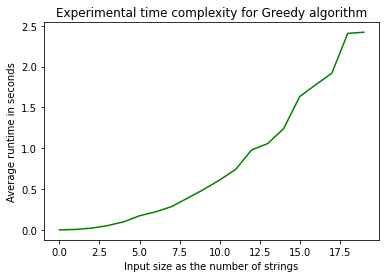

In [13]:
#greedy
#the plot code cells take some time to run 
import time
import matplotlib.pyplot as plt

def experimental_greedy(n):
    '''
    This function performs an experimental average runtime calculation for the greedy algorithm
    as we vary the input size which is the number of strings.

    Inputs
    --------
    n: int
        The maximum number of strings to test the algorithm for

    Returns
    ---------
    None
        This function produces a graph for the average runtime per input size
    '''
    # Random_Strings_Set = strings_maker(n)
    average_runtimes = []

    for i in range(n):
        # generate input size of length i
        Random_Strings_Set = strings_maker(i)
        runtime = 0

        # repeat each experiment 10 times
        for t in range(10):
            greedy_start_time = time.time()
            lenlcs_matrix = np.zeros((len(Random_Strings_Set), len(Random_Strings_Set)))
            length_matrix_experimental(lenlcs_matrix, Random_Strings_Set, i)
            greedy_end_time = time.time()
            runtime += (greedy_end_time - greedy_start_time)

        average_runtimes.append(runtime / 10)

    plt.plot(range(0, n, 1), average_runtimes, color='green')
    plt.title('Experimental time complexity for Greedy algorithm')
    plt.xlabel('Input size as the number of strings')
    plt.ylabel('Average runtime in seconds')
    plt.show()

experimental_greedy(20)


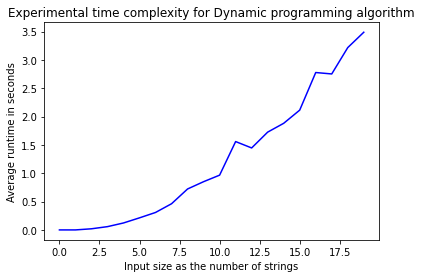

In [14]:
#dynamic
def experimental_dynamic(n):
    '''
    This function performs an experimental average runtime calculation for the Dynamic Programming algorithm
    as we vary the input size which is the number of strings.

    Inputs
    --------
    n: int
        The maximum number of strings to test the algorithm for

    Returns
    ---------
    None
        This function produces a graph for the average runtime per input size
    '''
    average_runtimes = []

    for i in range(n):
        # generate input size of length i
        Random_Strings_Set = strings_maker(i)
        runtime = 0

        # repeat each experiment 10 times
        for t in range(10):
            dynamic_start_time = time.time()
            all_sums(Random_Strings_Set)
            grandparent_finder(Random_Strings_Set)
            dynamic_end_time = time.time()
            runtime += (dynamic_end_time - dynamic_start_time)

        average_runtimes.append(runtime / 10)

    plt.plot(range(0, n, 1), average_runtimes, color='blue')
    plt.title('Experimental time complexity for Dynamic programming algorithm')
    plt.xlabel('Input size as the number of strings')
    plt.ylabel('Average runtime in seconds')
    plt.show()

experimental_dynamic(20)


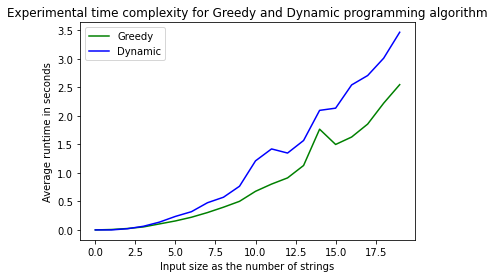

In [15]:
#this code cell takes time to run
#Comparison of greedy and dynamic programming runtime experiment


import time
import matplotlib.pyplot as plt
import numpy as np

def compare_greedy_dynamic(n):
    '''
    This function performs an experimental average runtime calculation for the greedy and
    Dynamic Programming algorithm to compare as we vary the input size which is the number of strings.

    Inputs
    --------
    n: int
        The maximum number of strings to test the algorithm for

    Returns
    ---------
    None
        This function produces a graph for the average runtime per input size for greedy and dynamic
    '''
    # this section is for the greedy algorithm
    greedy_average_runtimes = []

    for i in range(n):
        # generate input size of length i
        Random_Strings_Set = strings_maker(i)
        runtime = 0

        # repeat each experiment 5 times
        for t in range(5):
            greedy_start_time = time.time()
            len_lcs_matrix = np.zeros((len(Random_Strings_Set), len(Random_Strings_Set)))
            length_matrix_experimental(len_lcs_matrix, Random_Strings_Set, i)
            greedy_end_time = time.time()
            runtime += (greedy_end_time - greedy_start_time)

        greedy_average_runtimes.append(runtime / 5)

    # this section is for the dynamic programming algorithm
    dynamic_average_runtimes = []

    for i in range(n):
        # generate input size of length i
        Random_Strings_Set = strings_maker(i)
        runtime = 0

        # repeat each experiment 5 times
        for t in range(5):
            dynamic_start_time = time.time()
            all_sums(Random_Strings_Set)
            grandparent_finder(Random_Strings_Set)
            dynamic_end_time = time.time()
            runtime += (dynamic_end_time - dynamic_start_time)

        dynamic_average_runtimes.append(runtime / 5)

    plot1 = plt.plot(range(0, n, 1), greedy_average_runtimes, color='green', label='Greedy')
    plot2 = plt.plot(range(0, n, 1), dynamic_average_runtimes, color='blue', label='Dynamic')

    plt.title('Experimental time complexity for Greedy and Dynamic programming algorithm')
    plt.xlabel('Input size as the number of strings')
    plt.ylabel('Average runtime in seconds')
    plt.legend()
    plt.show()

compare_greedy_dynamic(20)


### Estimation of probability:

In [20]:
#this code isn't generated by me.
'''
Slowikowski, K. (2020). A simple version of the Needleman-Wunsch algorithm in Python [Source Code].
https://gist.github.com/slowkow/06c6dba9180d013dfd82bec217d22eb5
'''
import numpy as np

def needleman_wunsch_alignment(x, y, match=1, mismatch=1, gap=1):
    """
    Aligns two strings, highlighting differences with dashes and unmatching characters in the alignment.

    Parameters:
    x (str): The first input string.
    y (str): The second input string.
    match (int): The score for a match (default is 1).
    mismatch (int): The score for a mismatch (default is 1).
    gap (int): The score for a gap (default is 1).

    Returns:
    list: A list containing two strings representing the aligned sequences.
    """
    nx = len(x)
    ny = len(y)

    # Optimal score at each possible pair of characters.
    F = np.zeros((nx + 1, ny + 1))
    F[:, 0] = np.linspace(0, -nx * gap, nx + 1)
    F[0, :] = np.linspace(0, -ny * gap, ny + 1)

    # Pointers to trace through an optimal alignment.
    P = np.zeros((nx + 1, ny + 1))
    P[:, 0] = 3
    P[0, :] = 4

    # Temporary scores.
    t = np.zeros(3)

    for i in range(nx):
        for j in range(ny):
            if x[i] == y[j]:
                t[0] = F[i, j] + match
            else:
                t[0] = F[i, j] - mismatch
            t[1] = F[i, j + 1] - gap
            t[2] = F[i + 1, j] - gap

            tmax = np.max(t)
            F[i + 1, j + 1] = tmax

            if t[0] == tmax:
                P[i + 1, j + 1] += 2
            if t[1] == tmax:
                P[i + 1, j + 1] += 3
            if t[2] == tmax:
                P[i + 1, j + 1] += 4

    # Trace through an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []

    while i > 0 or j > 0:
        if P[i, j] in [2, 5, 6, 9]:
            rx.append(x[i - 1])
            ry.append(y[j - 1])
            i -= 1
            j -= 1
        elif P[i, j] in [3, 5, 7, 9]:
            rx.append(x[i - 1])
            ry.append('-')
            i -= 1
        elif P[i, j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j - 1])
            j -= 1

    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]

    aligned_sequences = [str(rx), str(ry)]
    return aligned_sequences


In [21]:
def generate_alignments(parental_relationships):
    """
    Generates alignments between each parent and child pair.

    Parameters:
    parental_relationships (list): A list of tuples, where each tuple represents a parent-child relationship.
                                  Each tuple contains two strings, representing the parent and child sequences.

    Returns:
    list: A list containing aligned sequences for each parent-child pair.
          Each element of the list is a tuple with two strings representing the aligned sequences.
    """
    aligned_strings = [needleman_wunsch_alignment(parent, child) for parent, child in parental_relationships]
    return aligned_strings


In [23]:
def count_operations(parent, child):
    """
    Counts the number of each operation for each pair of parent and child.

    Parameters:
    parent (str): The parent sequence.
    child (str): The child sequence.

    Returns:
    list: A list containing the count of deletions, insertions, and mutations.
          The elements are in the order [deletions, insertions, mutations].
    """
    deletions = 0
    insertions = 0
    mutations = 0

    for i in range(len(parent)):
        # If parent has '-' and child has a character in the same place,
        #it's an insertion
        if parent[i] == '-' and child[i] != '-':
            insertions += 1
        # If parent has a character and child has '-' in the same place, 
        #it's a deletion
        elif parent[i] != '-' and child[i] == '-':
            deletions += 1
        # If parent has a character different than the child, it's a mutation
        elif parent[i] != '-' and child[i] != '-' and parent[i] != child[i]:
            mutations += 1

    operations = [deletions, insertions, mutations]

    return operations


In [25]:
def count_operations_for_relationships(parental_relationships):
    """
    Gets the number of each operation for all pairs of parents and children.

    Parameters:
    parental_relationships (list): A list of lists where each sublist contains the parent and child strings.

    Returns:
    list: A list containing the number of operations (deletions, insertions, mutations) for each pair.
    """
    # Generate alignments for all parent-child pairs
    parent_child_alignments = generate_alignments(parental_relationships)
    
    # Initialize a list to store operation counts for each pair
    operation_counts = []

    # Iterate through each alignment and count operations
    for alignment in parent_child_alignments:
        operation_counts.append(count_operations(alignment[0], alignment[1]))

    return operation_counts


# Example usage
parental_relationships = [[b, c], [b, f], [c, a], [c, e], [f, d], [f, g]]
count_operations_for_relationships(parental_relationships)


[[2, 15, 7], [5, 12, 7], [3, 14, 6], [6, 11, 8], [2, 10, 4], [5, 11, 6]]

In [26]:
def print_modification_probabilities(parental_relationships):
    """
    Prints the probability of deletion, insertion, and mutation for each character 
    in the parent string to form the child string, and the average across all relationships.

    Parameters:
    parental_relationships (list): A list of lists where each sublist contains the parent and 
    child strings.
    """
    # Count operations for all parent-child pairs
    operation_counts = count_operations_for_relationships(parental_relationships)

    # Extract parents from the relationships
    parents = [relationship[0] for relationship in parental_relationships]

    p_order = 0
    total_deletion_probability = 0
    total_insertion_probability = 0
    total_mutations_probability = 0

    # Iterate through each pair's operation count
    for count in operation_counts:
        # Calculate final probabilities for each relationship
        final_deletion_probability = count[0] / len(parents[p_order])
        final_insertion_probability = count[1] / len(parents[p_order])
        final_mutations_probability = count[2] / len(parents[p_order])

        # Accumulate probabilities for averaging
        total_deletion_probability += final_deletion_probability
        total_insertion_probability += final_insertion_probability
        total_mutations_probability += final_mutations_probability

        # Print the estimation for each parental-child pair
        print(f"Estimation for Parent-Child Pair {p_order + 1}:")
        print(f"Deletion Probability: {final_deletion_probability}")
        print(f"Insertion Probability: {final_insertion_probability}")
        print(f"Mutation Probability: {final_mutations_probability}\n")

        p_order += 1

    # Calculate and print the average estimation across all parental-child pairs
    avg_deletion_probability = total_deletion_probability / len(parental_relationships)
    avg_insertion_probability = total_insertion_probability /\
    len(parental_relationships)
    avg_mutations_probability = total_mutations_probability /\
    len(parental_relationships)

    print("Average Estimation Across All Parental-Child Pairs:")
    print(f"Average Deletion Probability: {avg_deletion_probability}")
    print(f"Average Insertion Probability: {avg_insertion_probability}")
    print(f"Average Mutation Probability: {avg_mutations_probability}")


# Example usage
parental_relationships = [[b, c], [b, f], [c, a], [c, e], [f, d], [f, g]]
print_modification_probabilities(parental_relationships)


Estimation for Parent-Child Pair 1:
Deletion Probability: 0.02
Insertion Probability: 0.15
Mutation Probability: 0.07

Estimation for Parent-Child Pair 2:
Deletion Probability: 0.05
Insertion Probability: 0.12
Mutation Probability: 0.07

Estimation for Parent-Child Pair 3:
Deletion Probability: 0.02654867256637168
Insertion Probability: 0.12389380530973451
Mutation Probability: 0.05309734513274336

Estimation for Parent-Child Pair 4:
Deletion Probability: 0.05309734513274336
Insertion Probability: 0.09734513274336283
Mutation Probability: 0.07079646017699115

Estimation for Parent-Child Pair 5:
Deletion Probability: 0.018691588785046728
Insertion Probability: 0.09345794392523364
Mutation Probability: 0.037383177570093455

Estimation for Parent-Child Pair 6:
Deletion Probability: 0.04672897196261682
Insertion Probability: 0.102803738317757
Mutation Probability: 0.056074766355140186

Average Estimation Across All Parental-Child Pairs:
Average Deletion Probability: 0.03584442974112977
Ave